In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statistics
import os


In [2]:
root = os.getcwd()
df = pd.read_csv(root+'/../data/expert.csv')

# leave_one drug out

clf = LinearRegression()
def linear_regression(response,train,test,tags,temp_data):
    new_df = pd.DataFrame()
    for i in range(response.shape[1]-12):
        y = response.iloc[:,i]
        train_y = y[y.index.isin(tags)]
        test_y = y[~y.index.isin(tags)]   
        clf.fit(train, train_y)      
        clf_y = clf.predict(test)
        new_reponse = test_y.name
        new_df[new_reponse] = clf_y
    return new_df

results_dict = {}
for i in range(-12,0):
    col = df.columns[i]
    
    train = df[df[col] == 0]
    train_tag = train.index
    
    X = df.iloc[:,-12:]
    train_x = X[X.index.isin(train_tag)]
    test_x = X[~X.index.isin(train_tag)]
    
    temp_data = df[~df.index.isin(train_tag)].iloc[:,:87].reset_index(drop = True)
    
    my_result = linear_regression(df, train_x, test_x, train_tag, temp_data)
    my_result_x = temp_data
    x_all = my_result_x.values.flatten()
    my_result_y = my_result
    y_all = my_result_y.values.flatten()
    r = np.corrcoef(x_all, y_all)[0][1]
    
    results_dict[col] = r
    
print(results_dict)

{'aMEK': 0.8203552039176906, 'aAKT': 0.6760469536146301, 'aHDAC': 0.7214189176457174, 'aMDM2': 0.9256889947226673, 'aJAK': 0.911587622083226, 'aBRAFm': 0.8719448047546596, 'aPKC': 0.6779525964508675, 'aSTAT3': 0.9021462697367109, 'amTOR': 0.5914147254624393, 'aPI3K': 0.7791282904349194, 'aCDK4': 0.6342000388819489, 'aSRC': 0.8985285213268933}


In [3]:
values = results_dict.values()
statistics.mean(values)

0.7842010782526975

In [4]:
lr_result=list(results_dict.values())
cellbox = [0.846, 0.79, 0.706, 0.888, 0.888, 0.881, 0.672, 0.549, 0.891, 0.89, 0.605, 0.756]
statistics.mean(cellbox)        

0.7801666666666667

[Text(0, 0, 'cellbox'), Text(0, 0, 'linear regression')]

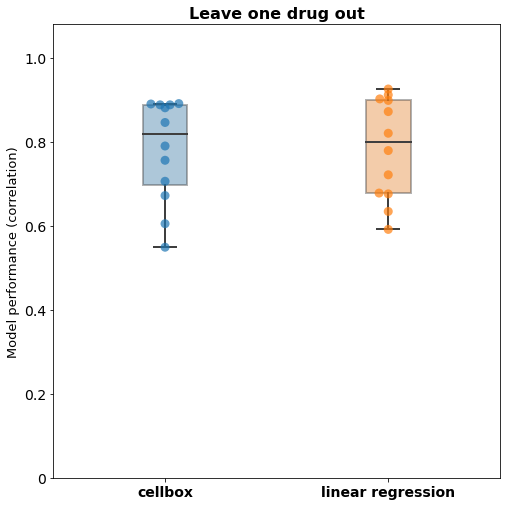

In [9]:
#box plot between CellBox and Linear Regression
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax2) = plt.subplots(1,figsize = [8, 10])
plt.gcf().subplots_adjust(bottom=0.25, wspace = 0.25)

plt.gcf().subplots_adjust(bottom=0.25, wspace = 0.25)

tmp_x, tmp_y = np.hstack([[2*np.ones(12), lr_result],
                          [np.ones(12), cellbox]])

sns.swarmplot(tmp_x, tmp_y, size = 9, alpha = 0.7)
sns.boxplot(tmp_x, tmp_y, linewidth=2, width = 0.2, boxprops=dict(alpha=0.4))

ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(0, 1.08)
ax2.set_title('Leave one drug out', 
              weight='bold', size=16)
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax2.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0], size=14)
ax2.set_ylabel('Model performance (correlation)', size = 13)
ax2.set_xticks(np.arange(0,2))
ax2.set_xticklabels(['cellbox','linear regression'], size = 14)
